# 전국 신규 민간 아파트 분양가격 동향
* 전혀 다른 두 개의 데이터를 가져와 df_last와 df_first라는 새로운 데이터 프레임으로 전처리한 후 df로 병합하는 과정을 공부하였다.
* Pandas라이브러리의 pivot_table, groupby 함수를 활용하여 데이터를 집계한 후 시각화할 수 있었고, Seaborn라이브러리를 통해서는 더 다양한 형태의 그래프로 시각화가 가능했다.
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기를 수 있었으며, 데이터 형식에 따른 다양한 시각화 방법이 있음을 알았다.
* 라이브러리의 다양한 함수와 활용 방법, 특히 전처리와 데이터를 병합하는 과정이 손에 익도록 여러 종류의 데이터를 활용해 반복적인 데이터 분석, 시각화 공부가 필요함을 느꼈다.

In [1]:
import pandas as pd

## EDA

In [2]:
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding = 'cp949')
df_last.shape    # 4335행, 5열
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [3]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding = 'cp949')
df_first.shape    # 17행, 22열
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


* 데이터 요약하기 

In [4]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


* 결측치 확인하기

In [5]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

## 전처리

In [6]:
# 분양가격 칼럼의 형태가 object이기 때문에 int형으로 바꿔줘야 함.
# astype()과, pandas의 함수인 to_numeric 만으로는 ' '를 해결할 수 없으므로 errors = 'coerce' 필요
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors = 'coerce')

In [7]:
# df_first 데이터의 단위와 맞춰서 평당분양가격이라는 컬럼을 생성하여 넣어줌.
df_last['평당분양가격'] = df_last['분양가격'] * 3.3

In [8]:
df_last.info()
df_last['분양가격'].describe()    # 수치데이터로 바꿔준 분양가격과 문자데이터인 분양가격(㎡)의 요약 결과는 다르게 나옴.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

* 규모구분을 전용면적 컬럼으로 변경

In [9]:
df_last['규모구분'].unique()    # 전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하', '전용면적 102㎡초과'
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', "")
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', "~")
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', "")
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '').str.strip()    # str.strip()으로 앞 뒤 공백도 제거
df_last['전용면적'].unique()

array(['전체', '60㎡', '60㎡~85㎡', '85㎡~102㎡', '102㎡~'], dtype=object)

* 사용하지 않는 컬럼 제거 ( 메모리 사용량 줄이고, 보기 좋게 )

In [10]:
df_last.head(1)
df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis = 1)    # 제거 완료
df_last.head(1) 

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


## groupby 로 데이터 집계하기

In [11]:
df_last.groupby(['지역명'])['평당분양가격'].mean()    # 지역명에 따른 평당분양가격의 평균을 보여줌.
df_last.groupby(['전용면적'])['평당분양가격'].mean()    # 전용면적에 따른 평당분양가격의 평균을 보여줌.

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [12]:
df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack().round()    
# 지역명, 전용면적에 따른 평당분양가격의 평균을 보여줌.
# unstack() : 끝에 위치한 index가 column 값으로 이동하여 테이블 형태로 나타냄
# round() : 소수점 이후 깔끔하게 정리

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [13]:
df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


## pivot table 로 데이터 집계하기

In [14]:
pd.pivot_table(df_last, index = '전용면적', values = '평당분양가격', aggfunc = "sum")

,평당분양가격
전용면적,
102㎡~,8995328.1
60㎡,8206733.7
60㎡~85㎡,8637944.7
85㎡~102㎡,7801612.5
전체,8642188.5


In [15]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
# df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round() 와 같은 데이터프레임 출력

df_last.pivot_table(index = '전용면적', columns = '지역명', values = '평당분양가격').round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [16]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()

p = df_last.pivot_table(index=["연도", "지역명"], values="평당분양가격")

p.loc[2018]     # loc 는 행을 기준으로 데이터를 불러옴

,평당분양가격
지역명,
강원,8219.255000
경기,14258.420000
경남,9327.670000
경북,8680.776923
광주,9526.953333
대구,12139.252632
대전,10234.106667
부산,12889.965000
서울,23202.245000


## 데이터 시각화

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')

### 선, 막대 그래프 (Pandas) 

<AxesSubplot:xlabel='지역명'>

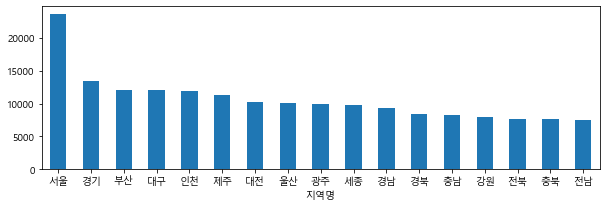

In [18]:
# 지역별 평당분양가격 평균
g = df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)    # sort_values : 정렬
g.plot.bar(rot = 0, figsize = (10,3))    # bar : 막대그래프, rot : 글씨 세로, figsize : 박스 너비

<AxesSubplot:xlabel='전용면적'>

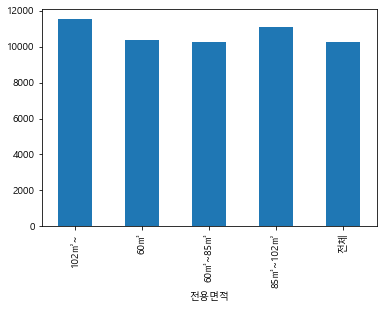

In [19]:
# 전용면적별 평당분양가격 평균 
df_last.groupby(['전용면적'])['평당분양가격'].mean().plot.bar()

<AxesSubplot:xlabel='연도'>

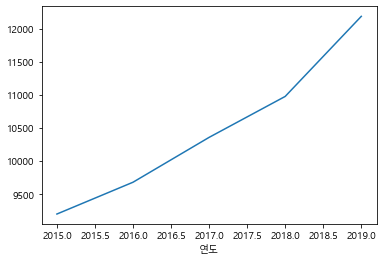

In [20]:
# 연도별 평당분양가격 평균
df_last.groupby(['연도'])['평당분양가격'].mean().plot()

### 박스 그래프 (Pandas)

* 이번엔 pivot_table을 사용해보겠음.

<AxesSubplot:>

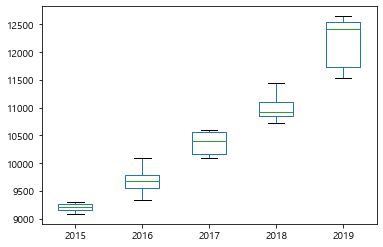

In [21]:
# x축은 연도, y축은 분양가격, 그림 하나의 세로폭은 월을 뜻함.
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

<AxesSubplot:>

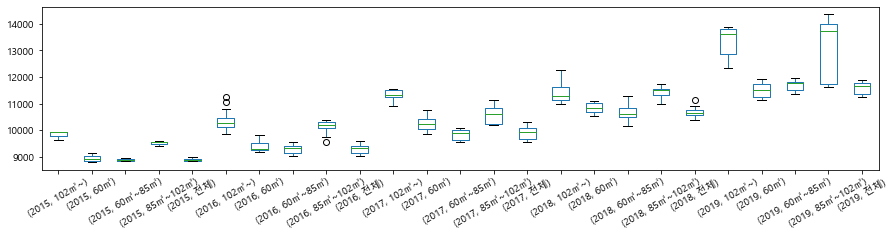

In [22]:
# columns(x축)에 전용면적 추가
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15,3), rot=30)

### Seaborn

In [23]:
import seaborn as sns

* barplot 알아보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

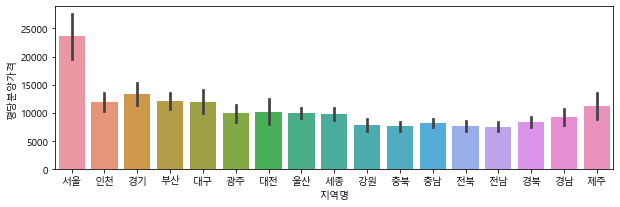

In [24]:
plt.figure(figsize = (10,3))    # 전체적인 그래프 사이즈 조절 (위에 써줘야 함)
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci="sd")     # ci(신뢰구간) 의 기본값은 95. / sd : 표준편차


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

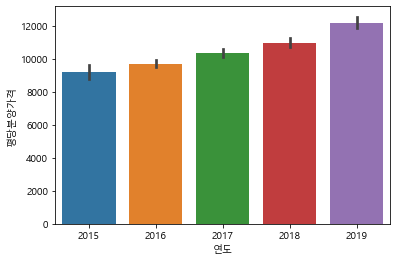

In [25]:
# barplot으로 연도별 평당 분양가격 그리기 - 꾸준히 상승함을 볼 수 있다.
sns.barplot(data=df_last, x="연도", y="평당분양가격")

* lineplot 알아보기

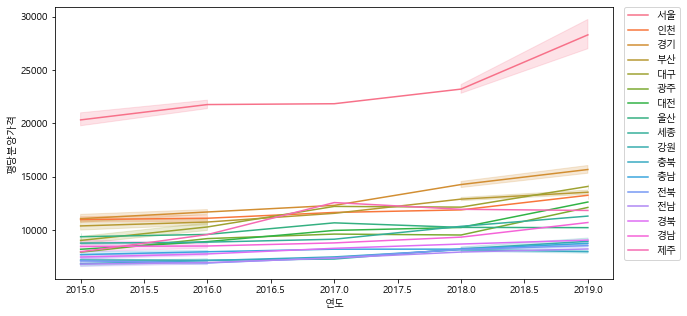

In [26]:
# lineplot으로 연도별 평당 분양가격 그리기
# hue 옵션을 통해 지역별로 다르게 표시
plt.figure(figsize = (10,5))
sns.lineplot(data=df_last, x = "연도", y = "평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)    # legend를 박스 밖에 표시하는 코드

* relplot 알아보기

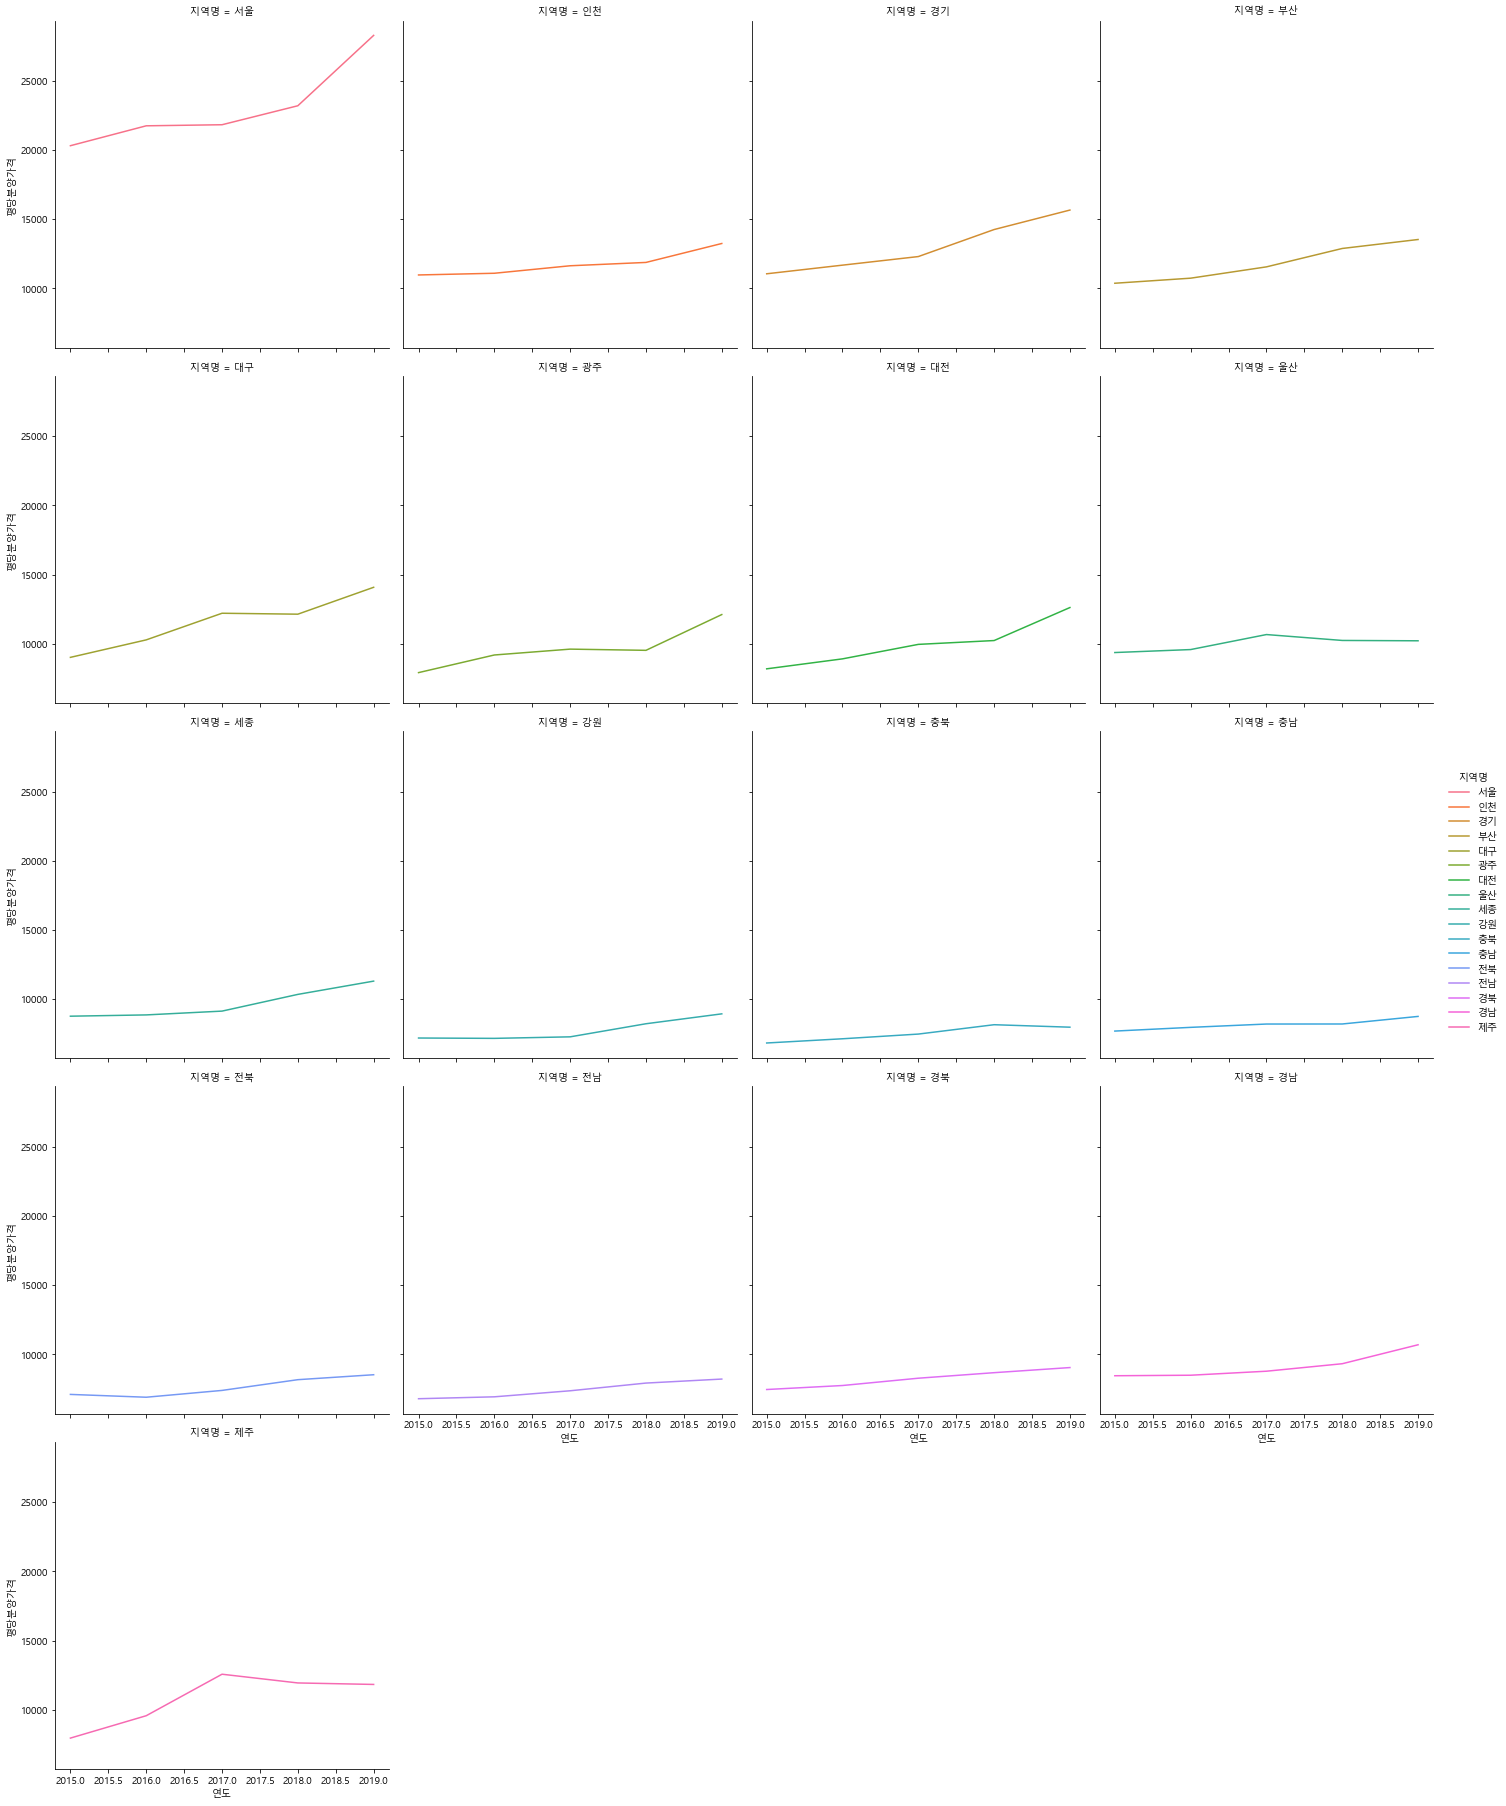

In [27]:
# lineplot을 서브플롯으로 그릴 수 있다.
# 컬럼별 다른 그래프를 확인할 수 있다.
sns.relplot(data = df_last, x = "연도", y = "평당분양가격", hue = "지역명", kind = "line", col = "지역명", col_wrap = 4, ci = None)

* catplot 알아보기

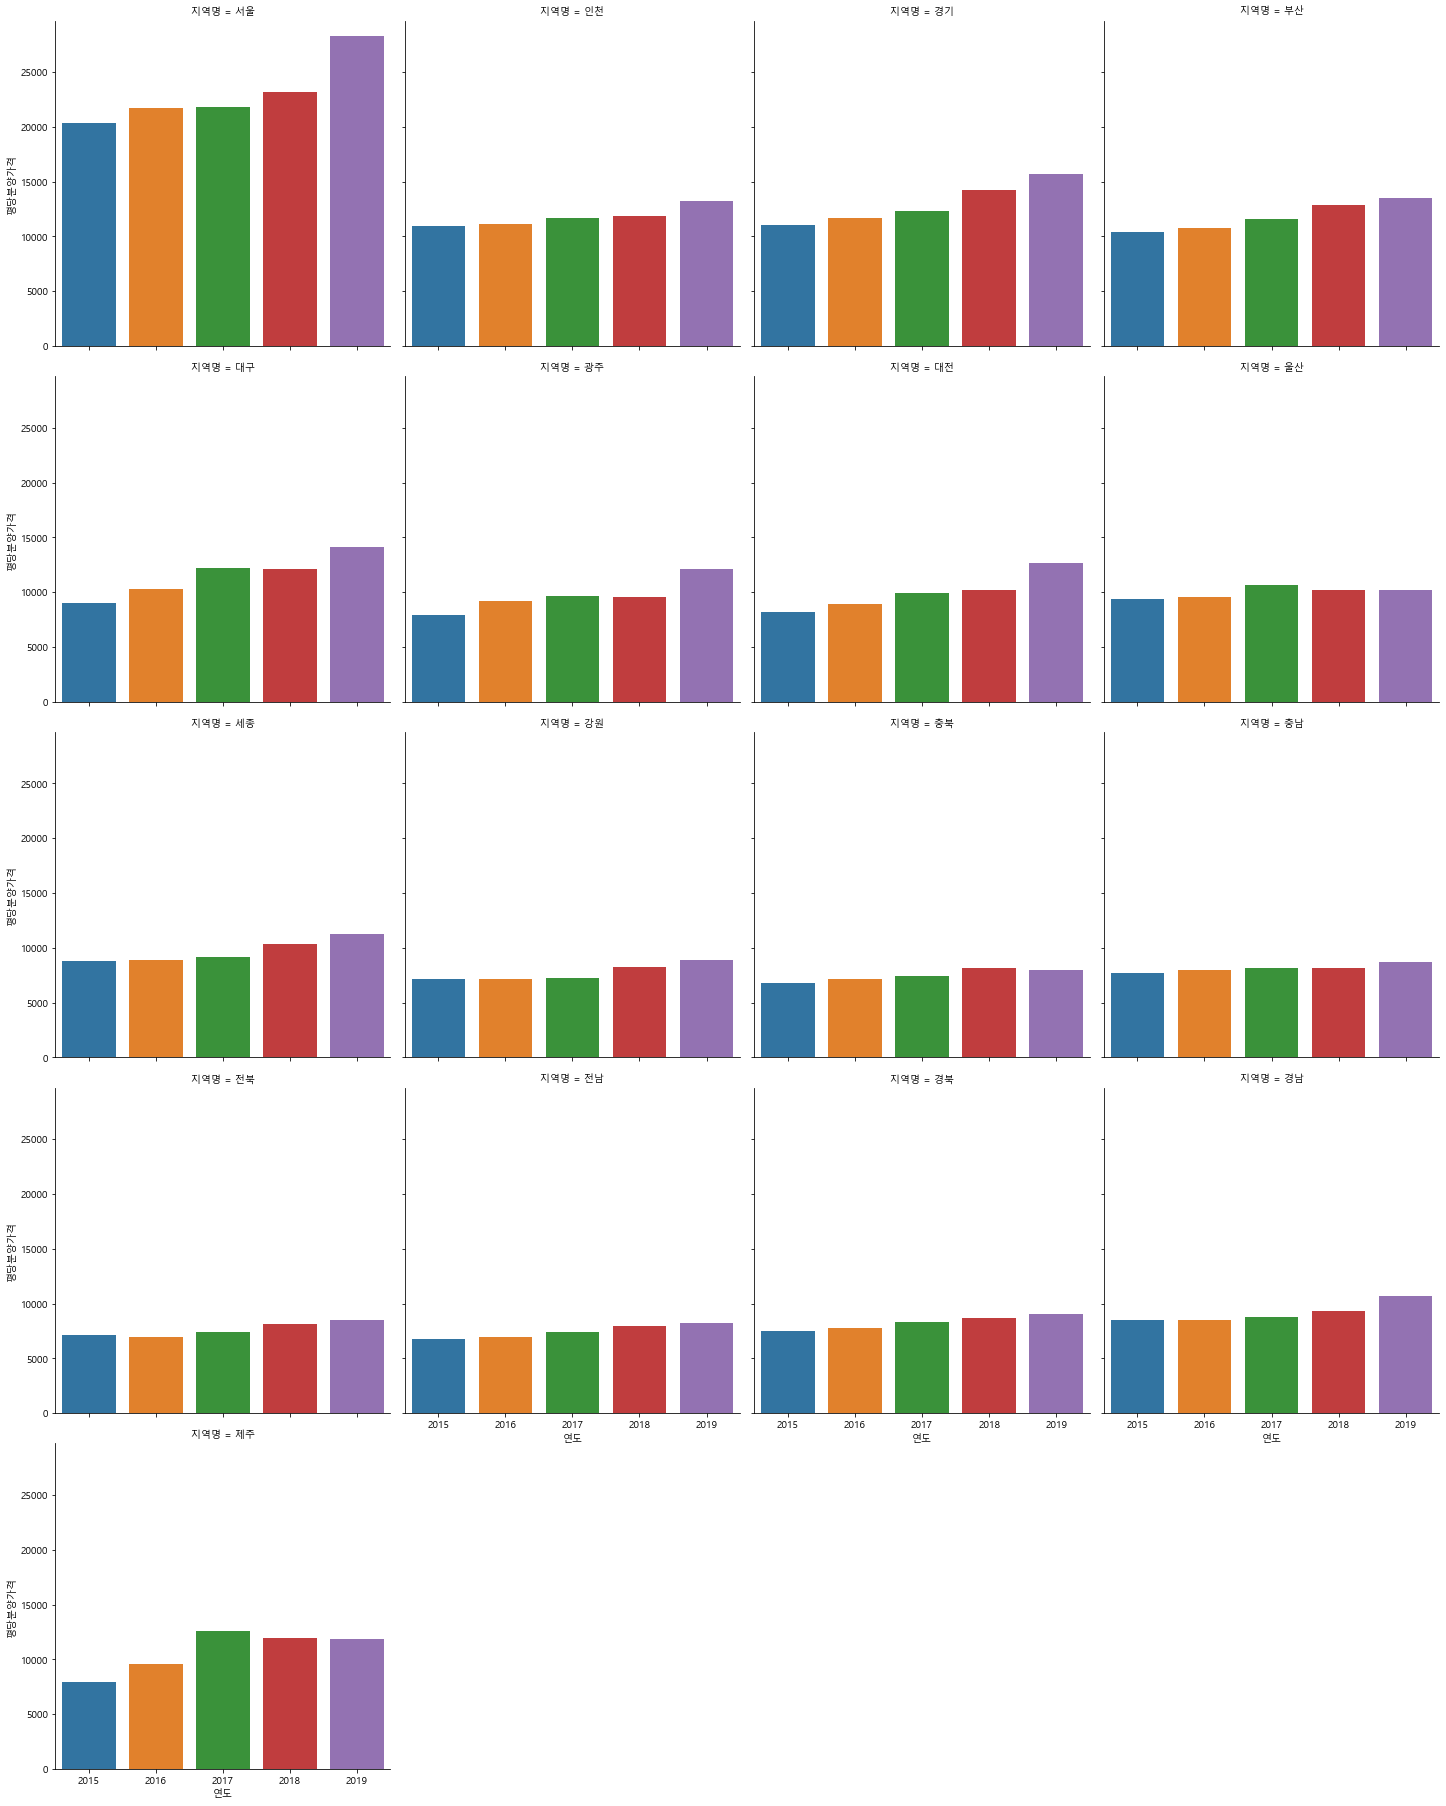

In [28]:
# kind의 기본값은 scatter 이다.
sns.catplot(data = df_last, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=4, ci=None)

* boxplot과 violinplot 알아보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

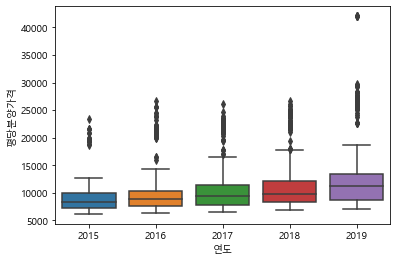

In [29]:
# boxplot으로 연도별 평당분양가격 그리기
# 최솟값, 제 1사분위수, 제 2사분위수, 제 3사분위수, 최댓값 표현

sns.boxplot(data = df_last, x = "연도", y = "평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

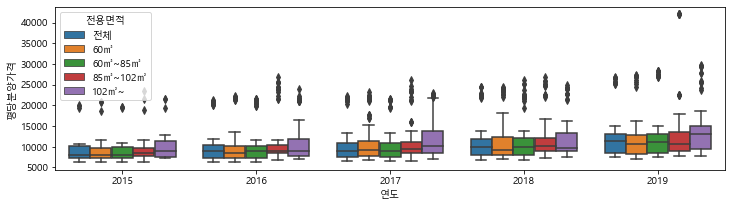

In [30]:
plt.figure(figsize = (12,3))
sns.boxplot(data = df_last, x = "연도", y = "평당분양가격", hue = "전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

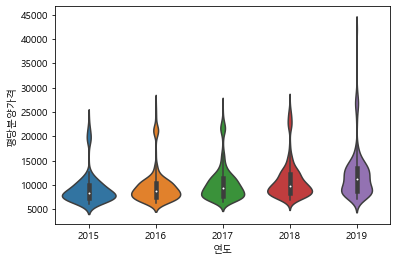

In [31]:
# violinplot으로 연도별 평당분양가격 그리기
# boxplot의 단점 보완 - box안의 데이터가 어떻게 분포 되어있는지 표현
sns.violinplot(data = df_last, x = "연도", y = "평당분양가격")

* lmplot과 swarmplot 알아보기

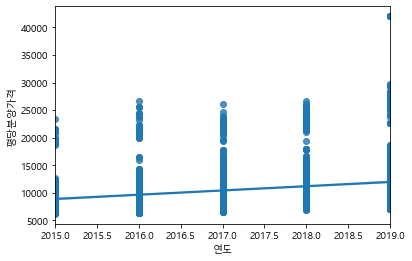

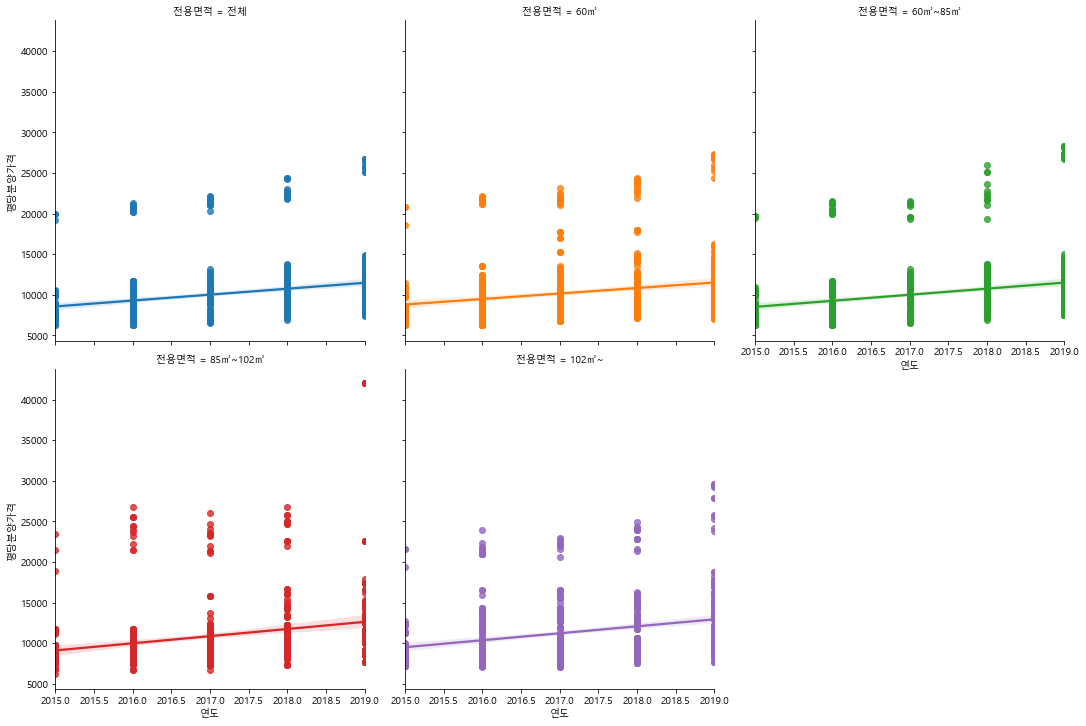

In [32]:
# scatterplot에 회귀선을 그려준 것이 regplot
# regplot에 hue 값을 추가 시켜주려면 lmplot 사용
sns.regplot(data = df_last, x = "연도", y = "평당분양가격")
sns.lmplot(data = df_last, x = "연도", y = "평당분양가격", hue = "전용면적", col = "전용면적", col_wrap = 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

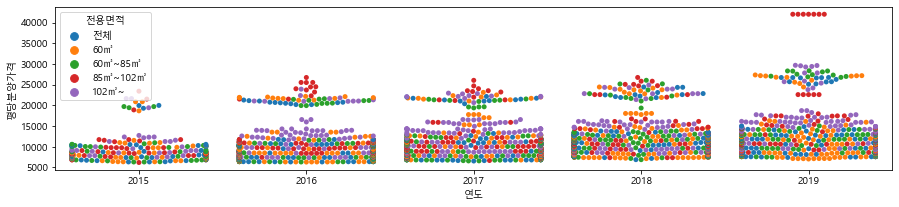

In [33]:
# swarmplot은 카테고리형 데이터의 산점도를 표현하기에 적합
plt.figure(figsize = (15,3))
sns.swarmplot(data = df_last, x = "연도", y = "평당분양가격", hue = "전용면적")

In [34]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [35]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [36]:
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


### 수치데이터만 가지고 시각화

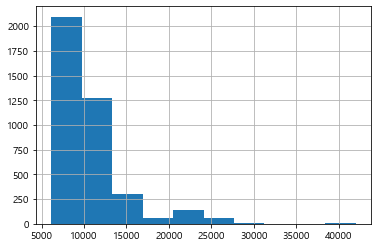

In [37]:
# 수치형 데이터는 히스토그램으로 그릴 수 있다.
h = df_last["평당분양가격"].hist(bins=10)

* distplot 알아보기

In [38]:
# 결측치가 없는 데이터에서 평당분양가격만 가져온다.
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

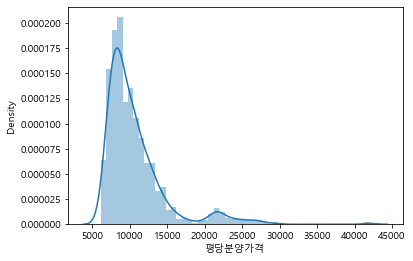

In [39]:
# distplot으로 평당분양가격 표현
sns.distplot(price)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-pack

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


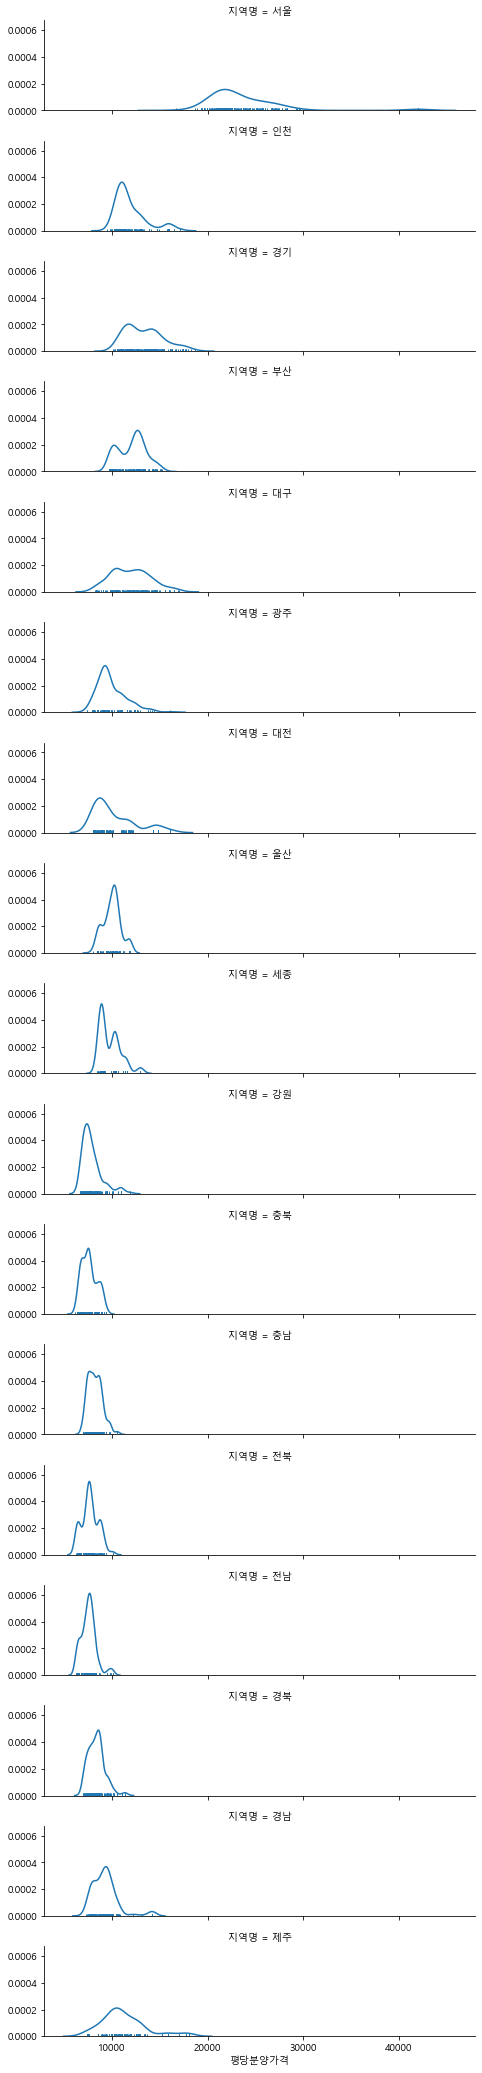

In [40]:
# subplot으로 표현하기
g = sns.FacetGrid(df_last, row = "지역명", height = 1.7, aspect = 4,)
g.map(sns.distplot, "평당분양가격", hist = False, rug = True)

## 2015년 8월 이전 데이터 보기

In [41]:
# 설정한 컬럼 수 만큼 표시함.
pd.options.display.max_columns = 25

In [42]:
# df_last와 전혀 다른 형태의 데이터프레임을 보여준다.
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [43]:
# 결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기

In [44]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [45]:
# melt 함수 활용법 !

df_first_melt = df_first.melt(id_vars = "지역", var_name = "기간", value_name = "평당분양가격")
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [53]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 변경
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


### 연도와 월 분리하기
* df_last의 데이터에서는 연도와 월을 분리하여 나타냈다. 이에따라 df_first 데이터셋의 연도와 월을 분리해준다.

In [59]:
# date라는 변수에 넣어줌
date = "2013년12월"

In [60]:
# split을 통한 텍스트 분리
date.split("년")

['2013', '12월']

In [62]:
# "월" 제거
date.split("년")[-1].replace("월", "")

'12'

In [71]:
# 연도를 반환하는 함수

def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

y = parse_year(date)
print(type(y))
y

<class 'int'>


2013

In [78]:
# 월을 반환하는 함수

def parse_month(date):
    month = date.split("년")[-1].replace("월", "")
    month = int(month)
    return month

m = parse_month(date)
print(type(m))
m

<class 'int'>


12

In [110]:
# apply를 통해 연도와 월만 따로 추출해 새로운 컬럼에 담을 수 있다.
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [108]:
df_last.head(5)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


## concat으로 두 개의 데이터프레임 하나로 합치기

### df_last와 df_first의 컬럼 값 통일

In [111]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [120]:
cols = ['지역명', '연도', '월', '평당분양가격']

In [121]:
# df_first에는 전용면적이 없기 때문에 "전체"만 사용하도록 한다.
# copy()를 사용함으로써 기존 df_last에 영향을 주지 않는다.
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [124]:
df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


### concat으로 합치기 

In [130]:
df = pd.concat([df_first_prepare, df_last_prepare])
df["연도"]. value_counts(sort = False)    # 데이터프레임이 합쳐짐을 확인할 수 있다.

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

## pivot_table 사용

In [133]:
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [135]:
# 연도를 인덱스, 지역명을 컬럼으로 평당분양가격의 피봇테이블로 그리기
t = pd.pivot_table(df, index = "연도", columns = "지역명", values = "평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

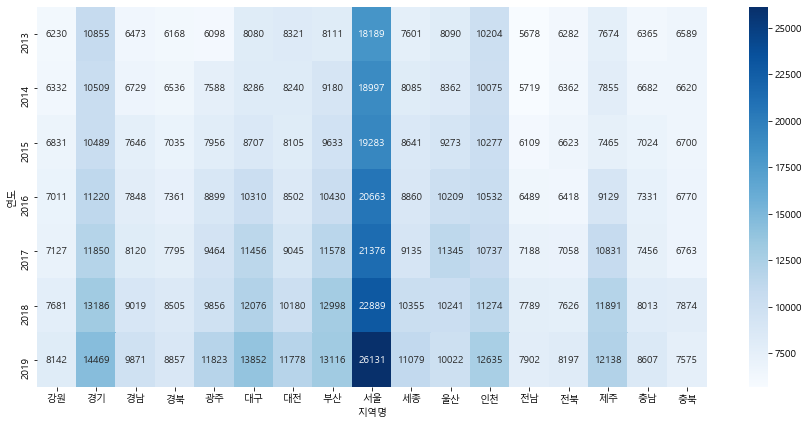

In [144]:
plt.figure(figsize = (15, 7))
sns.heatmap(t, cmap = "Blues", annot = True, fmt = ".0f")    # annot로 값을 같이 표현, fmt -> 소수점 없이 표현

In [147]:
# 행과 열을 바꿔주는 함수 (T 혹은 transpose())
t.transpose()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


In [155]:
# unstack : 마지막 multiindex를 컬럼으로 변경해주는 함수 -> pivot table과 같은 형태를 볼 수 있다.
g = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

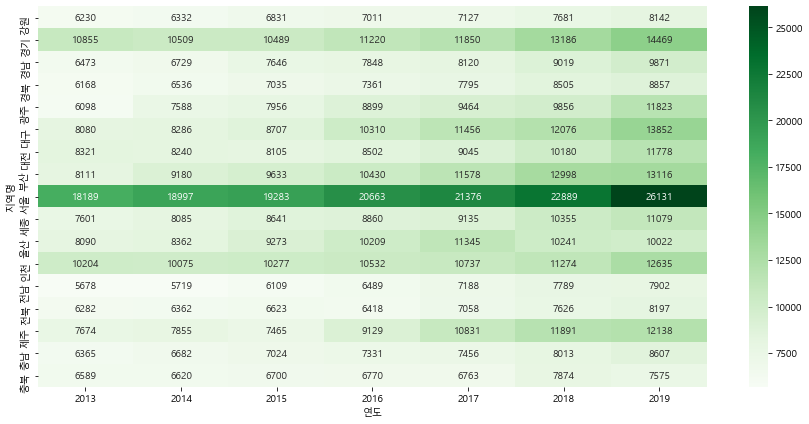

In [156]:
plt.figure(figsize = (15,7))
sns.heatmap(g.T, annot = True, fmt = ".0f", cmap = "Greens")

## 병합된 df 의 다양한 시각화

### 연도별 평당분양가격 알아보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

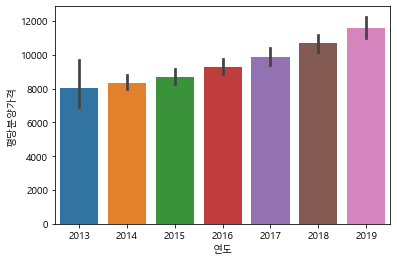

In [157]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data = df, x = "연도", y = "평당분양가격")

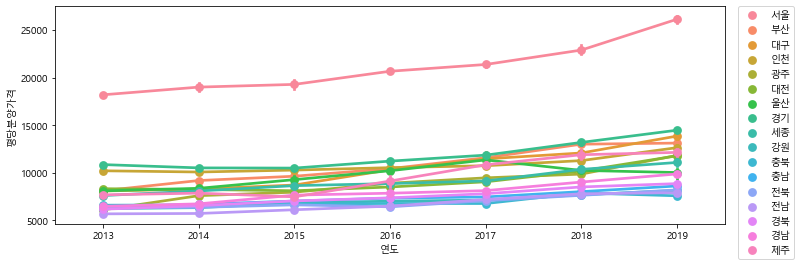

In [162]:
# pointplot으로 연도별 평당분양가격 그리기
plt.figure(figsize = (12,4))
sns.pointplot(data = df, x = "연도", y = "평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

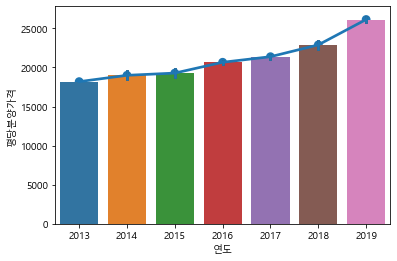

In [169]:
# 서울의 평당분양가격만 확인
df_seoul = df[df["지역명"] == "서울"].copy()
df_seoul

sns.barplot(data = df_seoul, x = "연도", y = "평당분양가격")
sns.pointplot(data = df_seoul, x = "연도", y = "평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

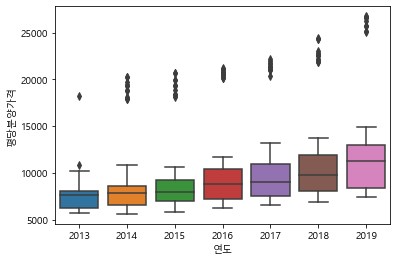

In [170]:
# boxplot으로 연도별 평당분양가격 그리기
sns.boxplot(data = df, x = "연도", y = "평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

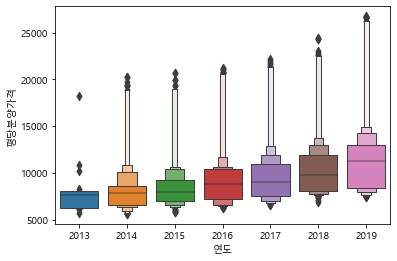

In [171]:
sns.boxenplot(data = df, x = "연도", y = "평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

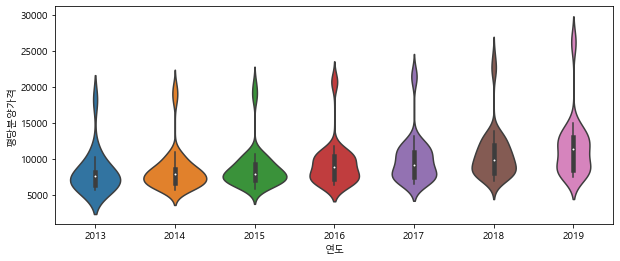

In [173]:
# violinplot으로 연도별 평당분양가격 그리기
plt.figure(figsize = (10,4))
sns.violinplot(data = df, x = "연도", y = "평당분양가격")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.0% of the points

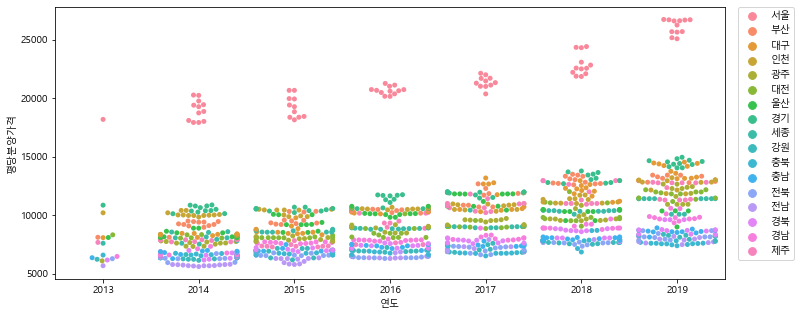

In [177]:
# swarmplot으로 연도별 평당분양가격 그리기    (scatterplot의 단점 보완)
plt.figure(figsize=(12,5))
sns.swarmplot(data = df, x = "연도", y = "평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### 지역별 평당분양가격 알아보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

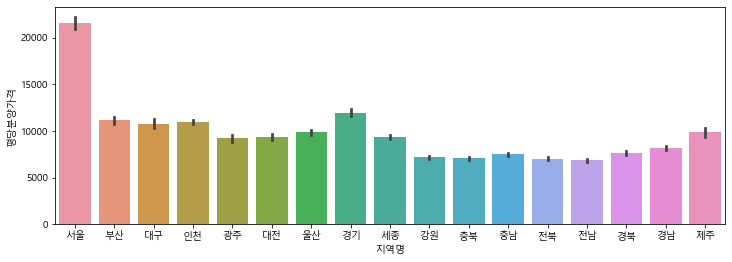

In [179]:
plt.figure(figsize = (12,4))
sns.barplot(data = df, x = "지역명", y = "평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

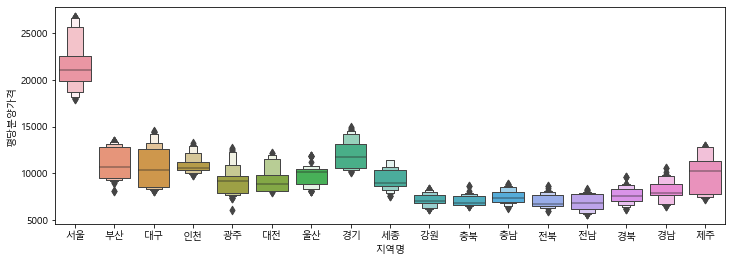

In [180]:
plt.figure(figsize = (12,4))
sns.boxenplot(data = df, x = "지역명", y = "평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

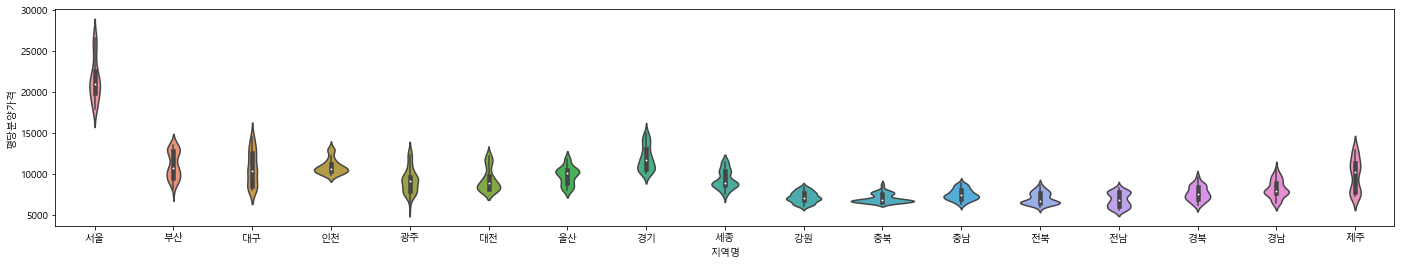

In [182]:
plt.figure(figsize = (24,4))
sns.violinplot(data = df, x = "지역명", y = "평당분양가격")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.8% of the points

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

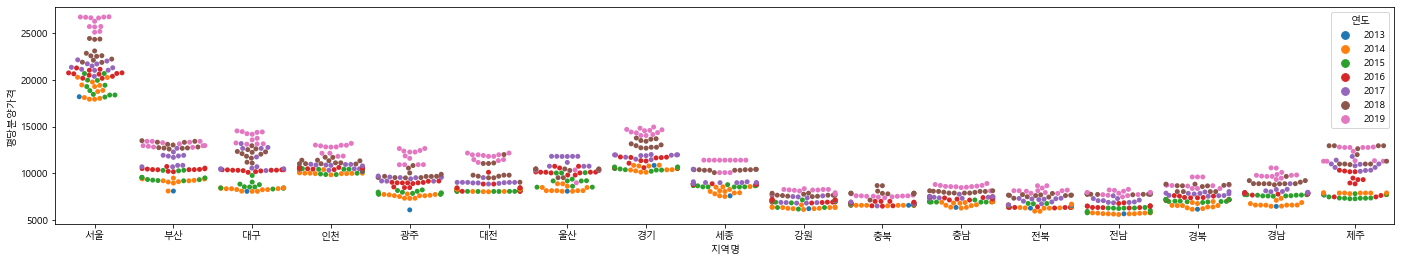

In [183]:
plt.figure(figsize = (24,4))
sns.swarmplot(data = df, x = "지역명", y = "평당분양가격", hue = "연도")